In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>10 Insights </h1>
<hr>
<h2>Using different kinds of visualizations...</h2>

<h2>No.1</h2>

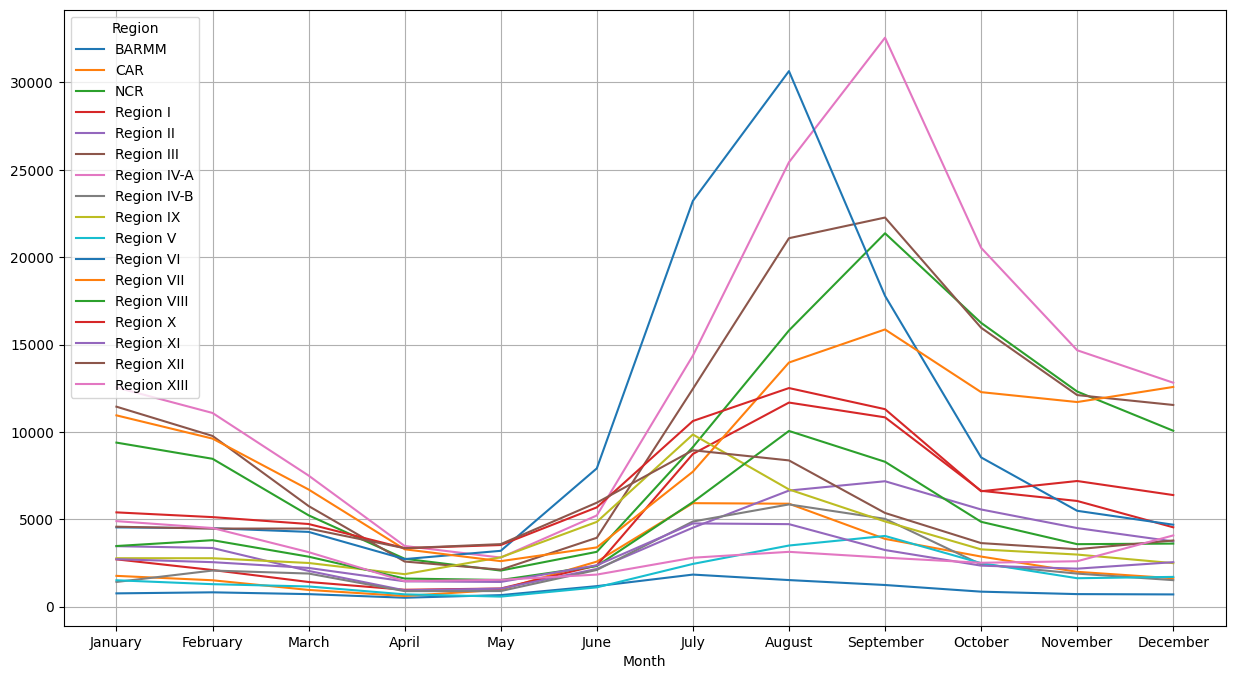

In [6]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=months, ordered=True)

monthly_cases = dengue.groupby(["Month", "Region"])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(15,8)
plt.grid(True)
plt.xticks(range(0,12), months)
plt.show()

<h2>Insights No1.</h2>
<h4>Using the line graph we will see the different kind of Regions that has records of dengue casses on our country month by month, Region 4-A has the most Dengue casses that have been recorded by the year 2016 - 2020 and the highest pick month rate is at the month of September with the record of almost 40,000 ,most of the dengue season starts at the month of May because it is the start of the rainy season at the Philippines the mosquitos lay eggs on water in different kind of places.</h4>
<hr>

<h3>Insights No.2</h3>
<h4>The BARMM or Bangsamoro Autonomous Region in Muslim Mindanao has the second to the highest dengue casses in the Philippines at the year 2016 - 2020 the higest pick of the month is at the month of August with 30,000+ records of casses it is a big number of dengue casses.The lowest Dengue casses in the Philippines at the year 2016 - 2020 is the region VI because of it's effective dengue control programs, specific geographical and environmental factors, and, historically, potentially lower human movement during the COVID-19 pandemic that's the main reason of the low dengue casses in the Region VI</h4>
<hr>

<hr>
<h2>No.2</h2>
<hr>

In [7]:
rr= dengue.groupby(['Month','Dengue_Deaths']).size()
rr.unstack()

Dengue_Deaths,0,1,2,3,4,5,6,7,8,9,...,481,492,548,584,648,668,1036,1270,1291,1651
Month,,,,,,,,,,,,,,,,,,,,,
January,12,10,13,8,12,5,7,2,2,2,...,0,0,0,0,0,0,0,0,0,0
February,10,15,17,13,5,9,1,4,1,4,...,0,0,0,0,0,0,0,0,0,0
March,16,10,20,13,6,4,3,2,1,2,...,0,0,0,0,0,0,0,0,0,0
April,22,22,17,5,6,3,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
May,28,19,11,12,5,4,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
June,20,12,11,8,9,7,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0
July,10,9,13,7,3,7,6,1,0,2,...,0,0,0,0,0,0,0,0,0,0
August,9,7,8,9,11,2,4,2,1,3,...,0,0,0,0,0,0,0,0,0,0
September,3,5,9,7,8,3,4,1,2,5,...,0,1,1,0,1,0,1,0,1,0


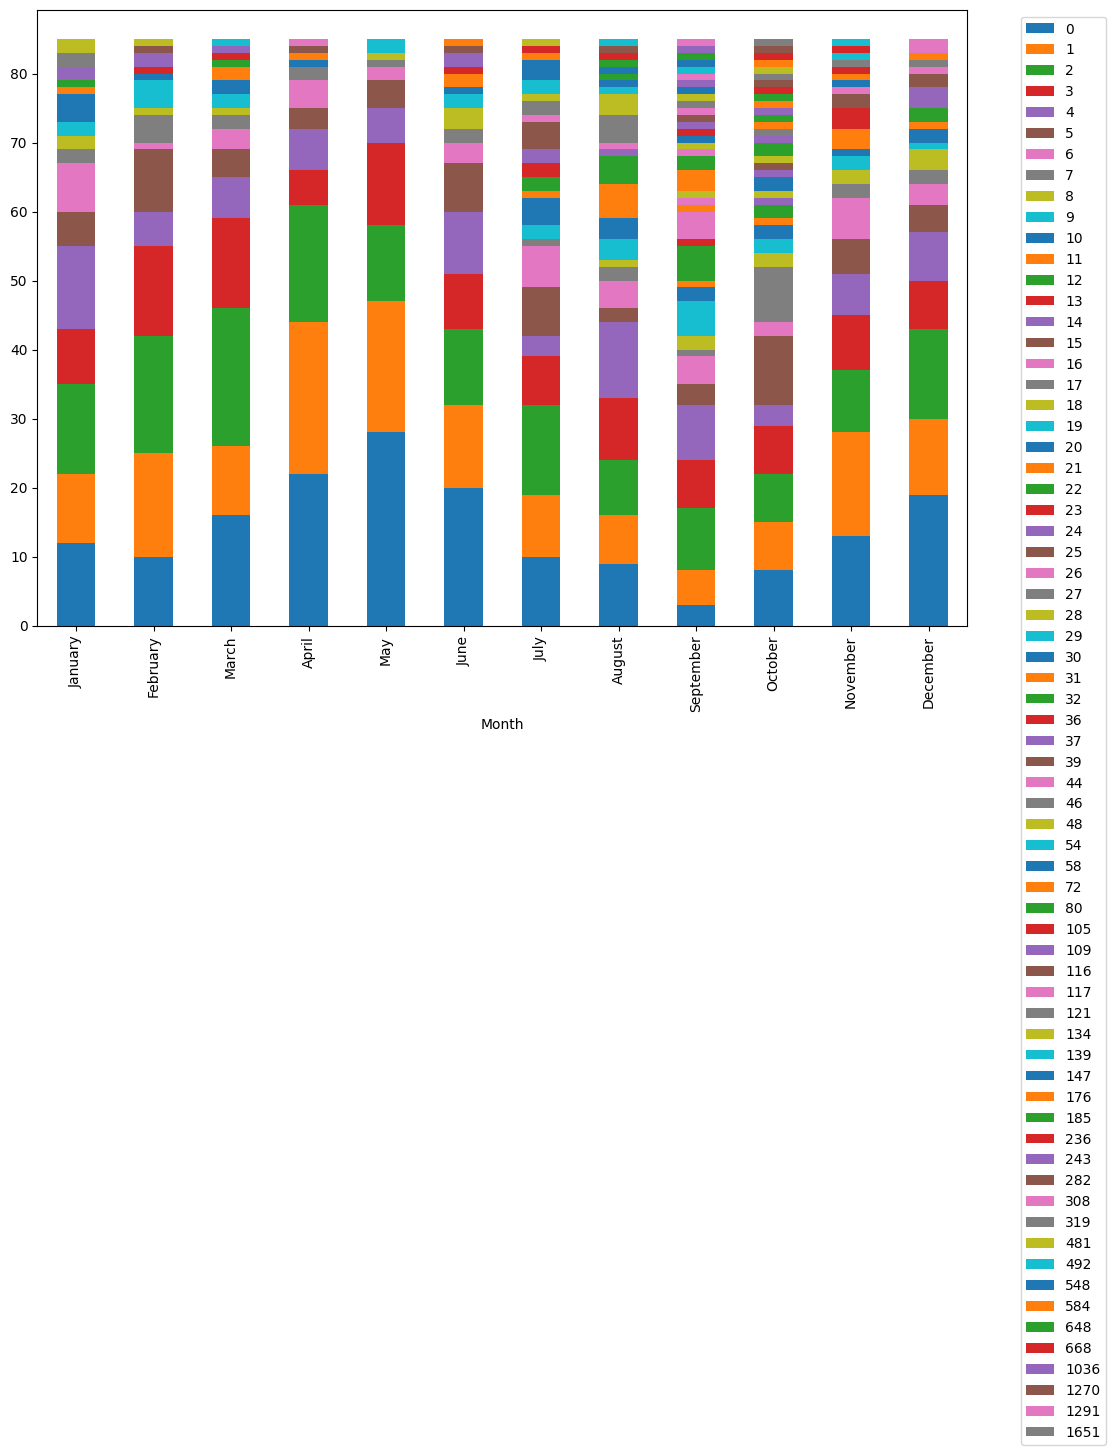

In [8]:
rr.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.show()

<h2>Insigths NO.3</h2>
<h4>By using the bar graph we can see the death rates record by the month of January to December the most month that have the most death rate is the month of September and October cause we can see that the most death rate there is always more than 1 death in a Month not like the other months on the graph and the highest numer of death in the month of October 2016 - 2020  is 1651 deaths and the the second to the highest on the same month is 1270 records and at the month of September the highest death record is 1291 and the second to the highest in the same month is 1036 records by the year 2016 - 2020.</h4>

<hr>
<h2>No.3</h2>
<hr>

In [9]:
Deaths_in_Region = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [10]:
Deaths_in_Region

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


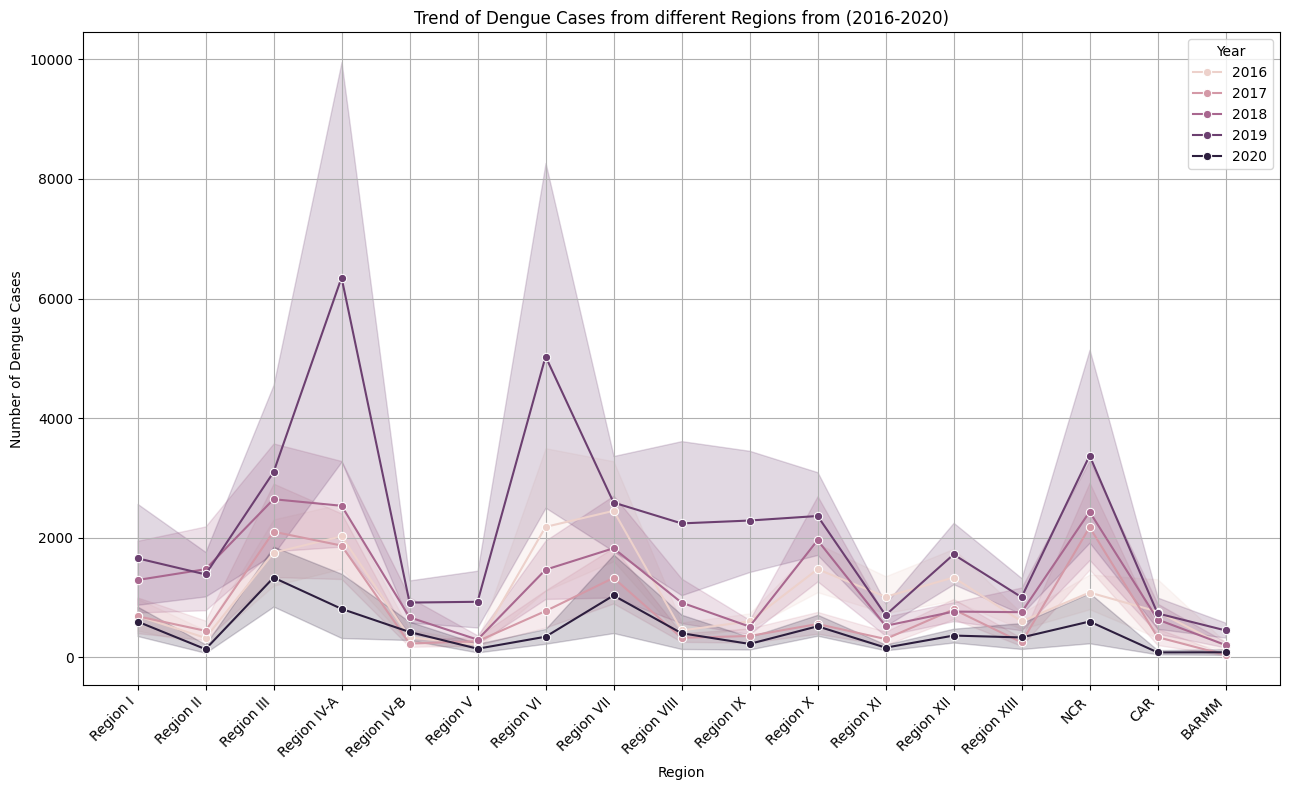

In [11]:
region =  ['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'Region VI', 'Region VII', 
           'Region VIII', 'Region IX', 'Region X','Region XI','Region XII','Region XIII','NCR','CAR','BARMM']
dengue['Region'] = pd.Categorical(dengue['Region'], categories=region, ordered=True)

# Create the line plot
sns.lineplot(data = dengue, x='Region', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases from different Regions from (2016-2020)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Insights No.4</h2>
<h4>The highest dengue casses in the Philippines is at the year 2019 with 441902 total of casses and the Region that had the most cases is the Region 4-A, by the year 2016-2020 the Region 4-A has 163029 records of Dengue and the 652 total of deaths and at the year 2020 Region 4-a Dengue casses goes down not like the year 2019.  </h4>
<hr>

<h2>Insights No.5</h2>
<h4>The Region that has the lowest dengue death Rate is the Region 	Region IV-B with 130 total of dengue death casses from year 2016 - 2020 ad it's total dengue casses is 30849 even if thier dengue casses is high they can still manage to save does patients with dengue. </h4>
<hr>

<h2>Insights No.6</h2>
<h4>The year that has the lowest Dengue Casses is at the year 2020 with just 91041 total of Dengue Cases, Because of the vaccine that help us to prevent the dengue desies and because of the anti dengue programs that the Regions did to their places it's a big help to people to prevent being sick because of the mosquitos that have dengue that can be pass through bitting the person with dengue to a person that will have dengue by it.    </h4>
<hr>

<hr>
<h1>No.4</h1>
<hr>

In [12]:
Death = dengue.groupby(["Year"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [13]:
Death

,Year,Dengue_Deaths,Dengue_Cases
0,2016,8127,209544
1,2017,4563,154155
2,2018,1226,250783
3,2019,1733,441902
4,2020,1195,91041


Dengue_Deaths,0,1,2,3,4,5,6,7,9,10,12,16
Year,,,,,,,,,,,,
2016,6.0,2.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2017,1.0,6.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2018,1.0,2.0,1.0,5.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2019,NaN,NaN,2.0,1.0,1.0,NaN,NaN,3.0,2.0,1.0,1.0,1.0
2020,3.0,4.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


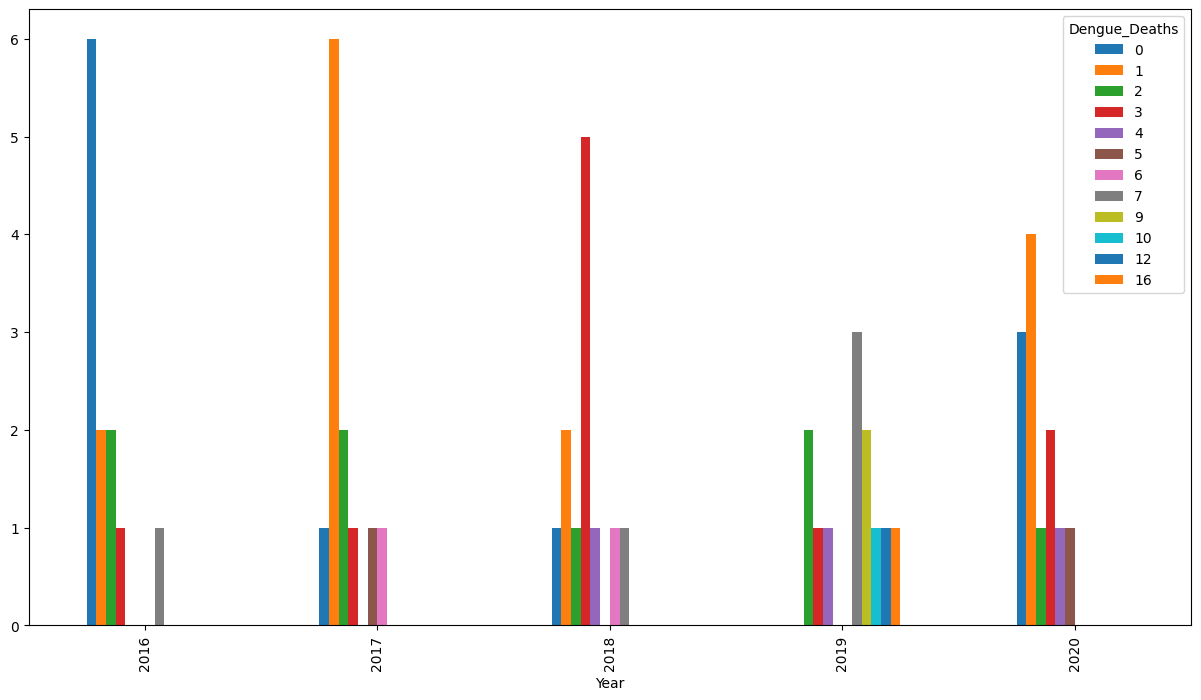

In [14]:
dbs = dengue[dengue['Region'] == 'Region V'].groupby(['Year', 'Dengue_Deaths']).size().unstack()
dbs.plot(kind='bar')
plt.gcf().set_size_inches(15,8)
dbs

<h2>Insights No.7</h2>
<h4>At Philippines year 2016 has the most dengue death rate with 8127 total of deaths becuase of Philippines doesn't have dengue vaccine at that time that can help people it's not hightech like in this time that we can easly help does people with dengue but still it's not 100% that they will be heald but most do survived.</h4>
<hr>

<h2>Insigths No.8</h2>
<h4>The lowest death rate from 2016 - 2020 inthe Philippines is at the year 2020 with 1195 total of death rate the number is still big but not as many as the other years that past because of more studies and more medicine that have been created more people survived from this sickness in any age you can have dengue when you are bitten by as inffected mosquito.</h4>
<hr>

<hr>
<h1>No.5</h1>
<hr>

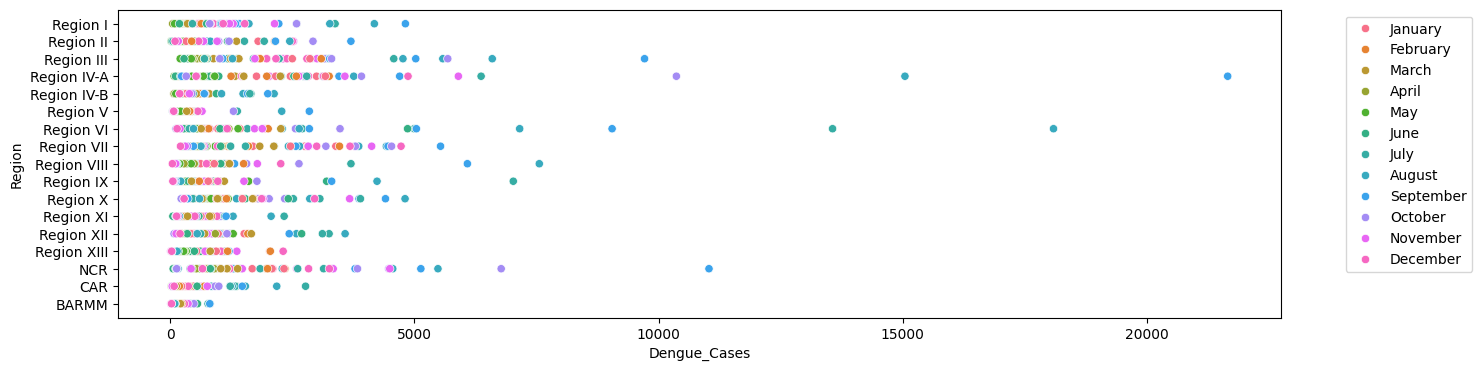

In [22]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Region", hue="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(15,4)
plt.show()

<h2>Insigths No.9</h2>
<h4>By this graph we use scatter plot to see the changes of Dengue casses that happened by month at the year 2016 - 2020  as using this plot the most month is the month of August and September</h4>
<hr>

<h2>Insigts No.10</h2>
<h4>In Over all of doing this Data Analytics we could say that in each year of the Dengue casses it's getting low as year past by but at the year 2019 the cases of Dengue goes up because of the issue of the vaccine that is being shots to the people to prevent having dengue that's why people are affraid to have a dengue vaccine. To prevent having dengue we should always clean our soroundings like always empty the buckets that is outside our houses or if we have collections of bottles that is just outside our houses empty it so the mosquitos won't live there. Put some anti mosquito lotions or patches so mosquitos won't bite you specially to those people that are O type blood they are the one's that the mosquito likes to bite. </h4>